
The script uses astroquery to download an astronomy catalog from the VizieR service.

	1.	It removes the default row limit so the entire table will be retrieved.
	2.	It specifies the catalog ID (J/A+A/691/A6/tablea1).
	3.	It fetches the table from VizieR.
	4.	It converts the table toa pandas DataFrame.
	5.	It prints the first few rows of the table.
	6.	It prints the list of all column names in the table.



In [1]:
from astroquery.vizier import Vizier
import pandas as pd

# No row limit
Vizier.ROW_LIMIT = -1

# Table ID
catalog_id = "J/A+A/691/A6/tablea1"

# Loading the table
result = Vizier.get_catalogs(catalog_id)

# Convert to pandas DataFrame
df = result[0].to_pandas()

# Show first few rows
print(df.head())

# Show all column names
print("\nColumn names:")
print(df.columns.tolist())

  Sample  GId  N     RAJ2000  DEJ2000         z         Rij         mu  \
0   m0V5    1  3  174.636993    0.734  0.106363   73.663002  25.105000   
1   m0V5    2  3  175.524002    0.804  0.286111   84.747002  25.975000   
2   m0V5    3  3  176.223999    0.706  0.235208   90.141998  25.729000   
3   m0V5    4  3  176.912003    0.773  0.295623  117.499001  26.299999   
4   m0V5    5  3  179.164001    0.715  0.269045   80.971001  25.143000   

    sigmav    tcr      rbmag      rfmag      r1MAG      r2MAG  
0  162.689  0.041  16.898001  17.684000 -20.889000 -20.420000  
1  321.055  0.024  19.007999  19.677000 -21.261000 -20.996000  
2   91.119  0.090  18.702000  19.674000 -21.059000 -20.518999  
3  210.422  0.051  19.476999  19.690001 -20.936001 -20.792999  
4  334.073  0.022  18.857000  19.336000 -21.358000 -20.947001  

Column names:
['Sample', 'GId', 'N', 'RAJ2000', 'DEJ2000', 'z', 'Rij', 'mu', 'sigmav', 'tcr', 'rbmag', 'rfmag', 'r1MAG', 'r2MAG']


This script downloads an astronomy catalog from VizieR, extracts the redshift column, and visualizes its distribution:

	1.	Removes the default row limit so all data is retrieved.
	2.	Loads the tabla1 catalog (J/A+A/691/A6/tablea1) and converts it to a pandas DataFrame.	
	3.	Finds the column containing redshift values (z).	
	4.	Removes missing entries.
	5.	Plots a histogram of redshift distribution using the Freedman–Diaconis binning rule.



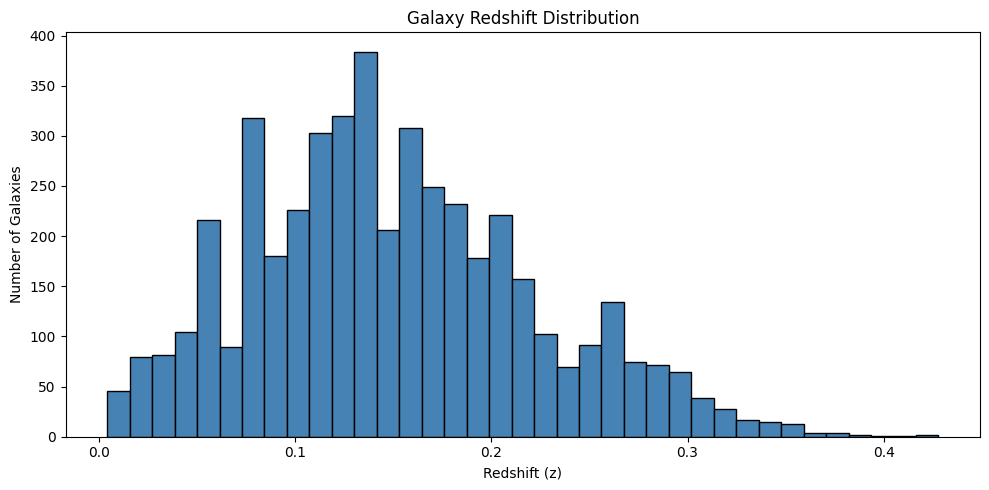

In [2]:
from astroquery.vizier import Vizier
import pandas as pd
import matplotlib.pyplot as plt

# Remove row limit
Vizier.ROW_LIMIT = -1

# Load tablea1
catalog_id = "J/A+A/691/A6/tablea1"
result = Vizier.get_catalogs(catalog_id)
df = result[0].to_pandas()

# Find the redshift column
z_col = next(col for col in df.columns if 'z' in col.lower())

# Remove NaN values
z_values = df[z_col].dropna()

# Build histogram
plt.figure(figsize=(10, 5))
plt.hist(z_values, bins='fd', color='steelblue', edgecolor='black')  # 'fd' = Freedman–Diaconis rule
plt.xlabel('Redshift (z)')
plt.ylabel('Number of Galaxies')
plt.title('Galaxy Redshift Distribution')
plt.tight_layout()
plt.show()


This script retrieves and analyzes galaxy photometry data from VizieR:

1.	Disables the row limit to load the full dataset.
2.	Downloads the tablea2 catalog (J/A+A/691/A6/tablea2) and converts it to a pandas DataFrame.
3.	Removes entries without gmag or rmag values.
4.	Calculates the color index g - r for each galaxy.
5.	Plots a histogram showing the distribution of galaxy colors using the Freedman–Diaconis binning rule.



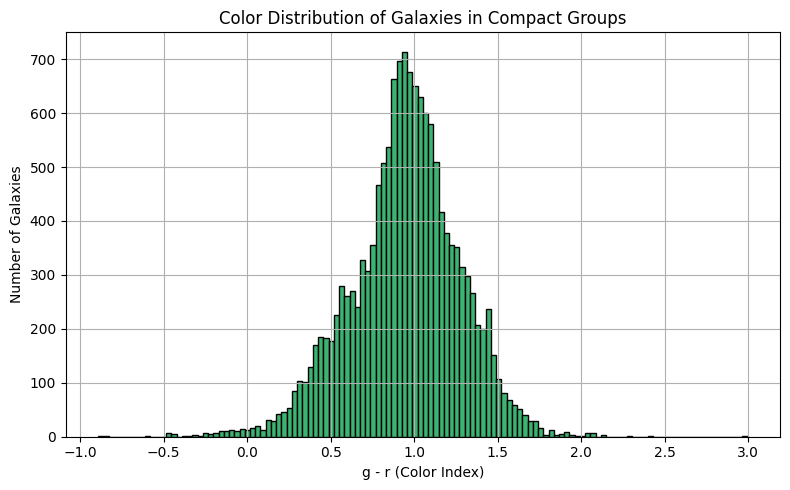

In [3]:
from astroquery.vizier import Vizier
import pandas as pd
import matplotlib.pyplot as plt

# Remove row limit
Vizier.ROW_LIMIT = -1

# Load a table tablea2
catalog_id = "J/A+A/691/A6/tablea2"
result = Vizier.get_catalogs(catalog_id)
df = result[0].to_pandas()

# Remove rows without gmag or rmag
df = df.dropna(subset=['gmag', 'rmag'])

# Calculate color index
df['g_r'] = df['gmag'] - df['rmag']

# Строим гистограмму
plt.figure(figsize=(8, 5))
plt.hist(df['g_r'], bins='fd', color='mediumseagreen', edgecolor='black')
plt.xlabel('g - r (Color Index)')
plt.ylabel('Number of Galaxies')
plt.title('Color Distribution of Galaxies in Compact Groups')
plt.grid(True)
plt.tight_layout()
plt.show()

This code fetches and visualizes galaxy photometric data from VizieR to study color evolution with redshift:

	1.	Loads all rows from the tablea2 catalog (J/A+A/691/A6/tablea2) without row limits.
	2.	Converts the catalog to a pandas DataFrame.
	3.	Filters the dataset to keep only galaxies with valid gmag (g-band magnitude), rmag (r-band magnitude), and z (redshift) values.
	4.	Calculates the color index g - r for each galaxy.
	5.	Plots a scatter plot of g - r versus redshift (z) to visualize how galaxy color changes over cosmic time.

This is essentially a color–redshift diagram for galaxies in compact groups.

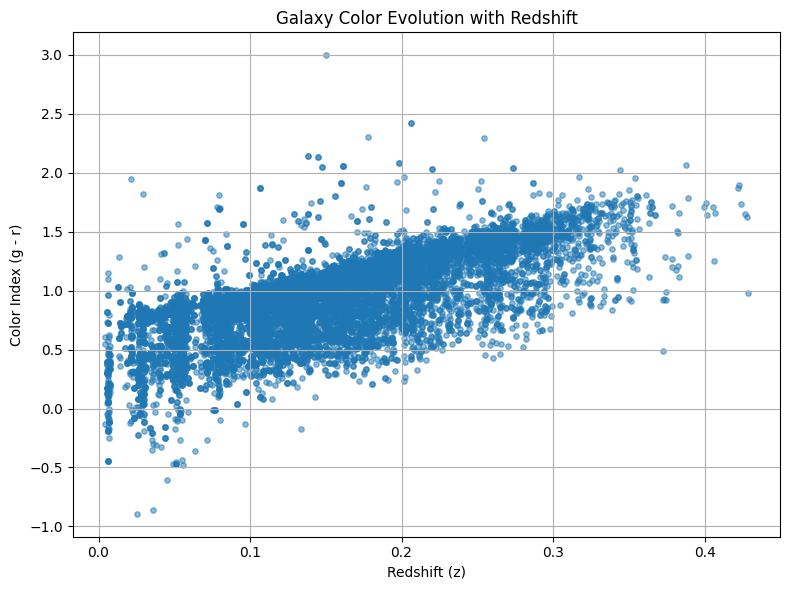

In [4]:
from astroquery.vizier import Vizier
import pandas as pd
import matplotlib.pyplot as plt

# Remove row limit
Vizier.ROW_LIMIT = -1

# Load table tablea2
catalog_id = "J/A+A/691/A6/tablea2"
result = Vizier.get_catalogs(catalog_id)
df = result[0].to_pandas()

# Filter: need gmag, rmag and z
df = df.dropna(subset=['gmag', 'rmag', 'z'])

# Calculate color index
df['g_r'] = df['gmag'] - df['rmag']

# Строим диаграмму
plt.figure(figsize=(8,6))
plt.scatter(df['z'], df['g_r'], s=15, alpha=0.5)
plt.xlabel('Redshift (z)')
plt.ylabel('Color Index (g - r)')
plt.title('Galaxy Color Evolution with Redshift')
plt.grid(True)
plt.tight_layout()
plt.show()

This code analyzes and compares the color index distribution (g - r) of galaxies in different redshift ranges:

	1.	Loads all rows from the tablea2 catalog (J/A+A/691/A6/tablea2) in VizieR.
	2.	Converts the data into a pandas DataFrame.
	3.	Filters the dataset to include only galaxies with valid values for gmag, rmag, and z and with rmag < 17 (brighter galaxies).
	4.	Computes the color index g - r.
	5.	Splits the galaxies into three redshift bins:
	•	z < 0.1 (nearby)
	•	0.1 ≤ z < 0.2 (intermediate)
	•	z ≥ 0.2 (more distant)
	6.	Plots overlapping histograms of g - r for each redshift range, using different colors.
	7.	Adds vertical dashed lines at g - r = 0.5 and g - r = 0.8 to indicate typical boundaries between blue galaxies and red sequence galaxies.

Essentially, it’s a color–magnitude analysis showing how galaxy colors are distributed at different distances (redshifts).

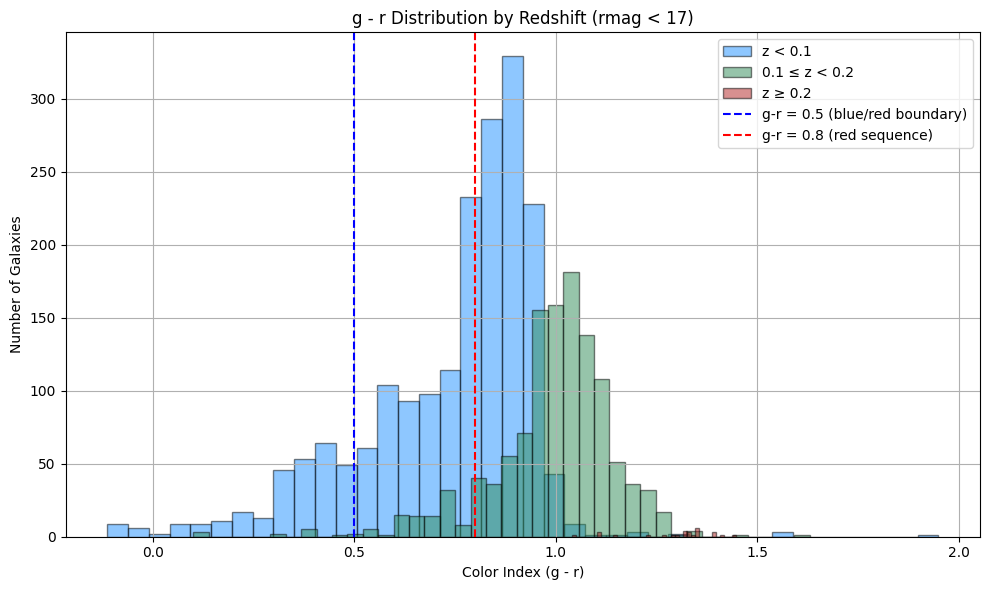

In [5]:
import matplotlib.pyplot as plt
from astroquery.vizier import Vizier
import pandas as pd

# Load data
Vizier.ROW_LIMIT = -1
catalog_id = "J/A+A/691/A6/tablea2"
result = Vizier.get_catalogs(catalog_id)
df = result[0].to_pandas()

# Вычисляем g - r и фильтруем
df = df.dropna(subset=['gmag', 'rmag', 'z', 'rmag'])
df['g_r'] = df['gmag'] - df['rmag']
df = df[df['rmag'] < 17]

# Разделение по z
z_ranges = {
    'z < 0.1': df[df['z'] < 0.1],
    '0.1 ≤ z < 0.2': df[(df['z'] >= 0.1) & (df['z'] < 0.2)],
    'z ≥ 0.2': df[df['z'] >= 0.2]
}

# Построение гистограмм
plt.figure(figsize=(10, 6))

colors = {
    'z < 0.1': 'dodgerblue',
    '0.1 ≤ z < 0.2': 'seagreen',
    'z ≥ 0.2': 'firebrick'
}

for label, subset in z_ranges.items():
    plt.hist(subset['g_r'], bins=40, alpha=0.5, label=label,
             color=colors[label], edgecolor='black')

# Добавляем вертикальные линии классификации
plt.axvline(0.5, color='blue', linestyle='--', label='g-r = 0.5 (blue/red boundary)')
plt.axvline(0.8, color='red', linestyle='--', label='g-r = 0.8 (red sequence)')

plt.xlabel('Color Index (g - r)')
plt.ylabel('Number of Galaxies')
plt.title('g - r Distribution by Redshift (rmag < 17)')
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()

This code creates a dark-themed animated histogram showing the step-by-step accumulation of galaxy colors (g - r) from a VizieR catalog:

	1.	Loads all rows from tablea2 (J/A+A/691/A6/tablea2) in VizieR and converts to a pandas DataFrame.
	2.	Filters to keep only galaxies with both gmag and rmag.
	3.	Calculates the g - r color index for each galaxy.
	4.	Prepares histogram bins using the Freedman–Diaconis rule (bins='fd') and initializes empty bin counts.
	5.	Sets up a dark mode plot with black background, mint-green bars, and light text.
	6.	Defines an update function that:
	•	Adds a batch of galaxies (STEP per frame) into the histogram counts.
	•	Redraws the bar chart with updated totals.
	•	Shows the number of galaxies processed so far in the title.
	7.	Uses matplotlib.animation.FuncAnimation to create the animation, with the total number of frames determined by how many batches are needed to go through all galaxies.
	8.	Saves the animation as "color_accumulation.mp4" using the FFmpeg writer at 20 FPS.

Essentially, the animation starts with an empty histogram and visually fills it in over time as more galaxy color data is added frame by frame.

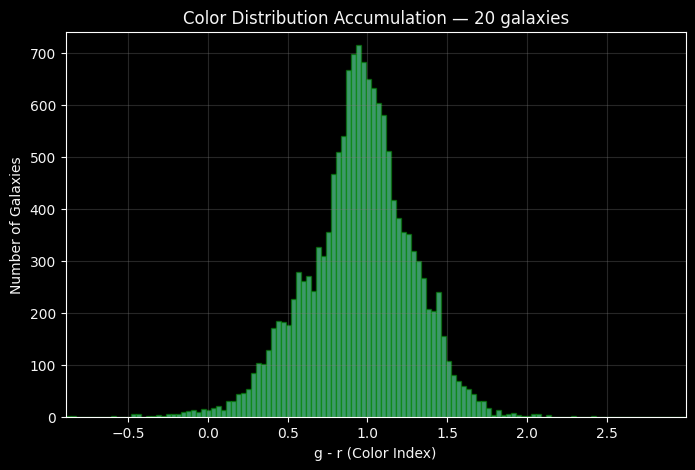

In [7]:
from astroquery.vizier import Vizier
import pandas as pd
import matplotlib.pyplot as plt
from matplotlib.animation import FuncAnimation
import numpy as np

# === PARAMETER: step for adding points ===
STEP = 20  # can be increased to 50 or 100

# Load table
Vizier.ROW_LIMIT = -1
catalog_id = "J/A+A/691/A6/tablea2"
result = Vizier.get_catalogs(catalog_id)
df = result[0].to_pandas()

# Calculate color
df = df.dropna(subset=['gmag', 'rmag'])
df['g_r'] = df['gmag'] - df['rmag']
g_r_values = df['g_r'].values

# Bins as in the original histogram
_, bin_edges = np.histogram(g_r_values, bins='fd')
bin_centers = (bin_edges[:-1] + bin_edges[1:]) / 2
bin_counts = np.zeros(len(bin_edges) - 1)

# === Setting up the dark theme for the plot ===
plt.style.use('dark_background')
fig, ax = plt.subplots(figsize=(8, 5))
fig.patch.set_facecolor('black')
ax.set_facecolor('black')

# Colors
text_color = 'whitesmoke'
grid_color = 'gray'
bar_color = (0.4, 1.0, 0.7, 0.5)  # полупрозрачная мятная зелень

def update(frame):
    ax.clear()
    start = frame * STEP
    end = min(len(g_r_values), (frame + 1) * STEP)
    new_data = g_r_values[start:end]
    inds = np.digitize(new_data, bin_edges) - 1

    for i in inds:
        if 0 <= i < len(bin_counts):
            bin_counts[i] += 1

    ax.bar(bin_centers, bin_counts, width=np.diff(bin_edges),
           color=bar_color, edgecolor='green', alpha=0.6)

    ax.set_xlabel('g - r (Color Index)', color=text_color)
    ax.set_ylabel('Number of Galaxies', color=text_color)
    ax.set_title(f'Color Distribution Accumulation — {end} galaxies', color=text_color)

    ax.set_xlim(bin_edges[0], bin_edges[-1])
    ax.set_ylim(0, 740)

    ax.tick_params(colors=text_color)
    ax.grid(True, color=grid_color, alpha=0.3)

# Number of frames
num_frames = int(np.ceil(len(g_r_values) / STEP))

# Animation
anim = FuncAnimation(fig, update, frames=num_frames, interval=30, repeat=False)

# Для Jupyter
# from IPython.display import HTML
# HTML(anim.to_jshtml())

anim.save("color_accumulation.mp4", writer="ffmpeg", fps=20)


This code creates an animated simulation of galaxy color-index histograms for different redshift ranges, using pre-computed data from the VizieR tablea2 catalog.

Step-by-step breakdown:

	1.	Data loading
	•	Connects to the VizieR service and retrieves the table J/A+A/691/A6/tablea2.
	•	Removes rows without gmag, rmag, or z.
	•	Filters to galaxies brighter than rmag < 17.
	•	Calculates the color index g - r for each galaxy.
	2.	Redshift grouping
	•	Splits galaxies into three bins by redshift:
	•	z < 0.1 (nearby galaxies, blue color)
	•	0.1 ≤ z < 0.2 (intermediate distance, green color)
	•	z ≥ 0.2 (distant galaxies, red color)
	3.	Histogram computation
	•	Uses the same fixed bin edges for all groups.
	•	Precomputes histogram counts for each redshift range.
	4.	Plot setup
	•	Creates a grouped histogram plot where each redshift range is represented by a different color with semi-transparent bars.
	•	Adds two vertical reference lines at g - r = 0.5 (blue/red galaxy boundary) and g - r = 0.8 (red sequence).
	•	Configures axis limits, labels, title, and grid.
	5.	Animation logic
	•	In each frame, the precomputed histogram counts are slightly varied with random Gaussian noise to simulate fluctuations, while keeping values non-negative.
	•	Updates the heights of the bars for each redshift group.
	6.	Output
	•	Runs the animation for 300 frames with a 300 ms interval per frame.
	•	Saves the result as "color_simulation.mp4" at 20 FPS using FFmpeg.

In essence:
This script takes static galaxy color distributions for different redshift ranges and turns them into a dynamically fluctuating animation, visually illustrating how galaxy populations might vary if observed repeatedly.

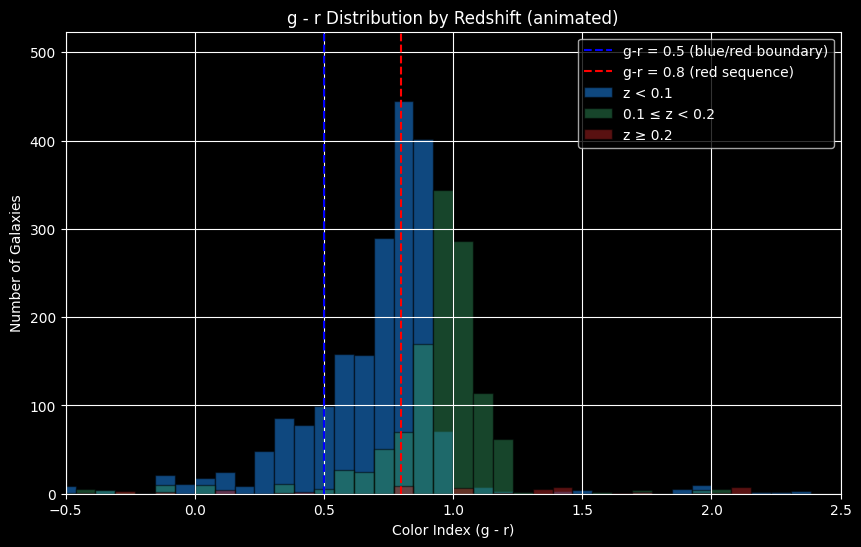

In [8]:
import matplotlib.pyplot as plt
from matplotlib.animation import FuncAnimation
from astroquery.vizier import Vizier
import pandas as pd
import numpy as np

# Loading table
Vizier.ROW_LIMIT = -1
catalog_id = "J/A+A/691/A6/tablea2"
result = Vizier.get_catalogs(catalog_id)
df = result[0].to_pandas()

# Data preparation
df = df.dropna(subset=['gmag', 'rmag', 'z'])
df['g_r'] = df['gmag'] - df['rmag']
df = df[df['rmag'] < 17]

# Division by z
z_ranges = {
    'z < 0.1': df[df['z'] < 0.1],
    '0.1 ≤ z < 0.2': df[(df['z'] >= 0.1) & (df['z'] < 0.2)],
    'z ≥ 0.2': df[df['z'] >= 0.2]
}

colors = {
    'z < 0.1': 'dodgerblue',
    '0.1 ≤ z < 0.2': 'seagreen',
    'z ≥ 0.2': 'firebrick'
}

# Common bins
bins = np.linspace(-0.5, 2.5, 40)

# Pre-calculate original histograms
hist_data = {label: np.histogram(subset['g_r'], bins=bins)[0]
             for label, subset in z_ranges.items()}

# Figure preparation
fig, ax = plt.subplots(figsize=(10, 6))
bar_containers = {}

# Initial plot
for label, counts in hist_data.items():
    bar_containers[label] = ax.bar(bins[:-1], counts, width=np.diff(bins), alpha=0.5,
                                    label=label, color=colors[label], edgecolor='black')

# Vertical lines
vline1 = ax.axvline(0.5, color='blue', linestyle='--', label='g-r = 0.5 (blue/red boundary)')
vline2 = ax.axvline(0.8, color='red', linestyle='--', label='g-r = 0.8 (red sequence)')

# Axes
ax.set_xlim(-0.5, 2.5)
ax.set_ylim(0, max([max(c) for c in hist_data.values()]) * 1.2)
ax.set_xlabel('Color Index (g - r)')
ax.set_ylabel('Number of Galaxies')
ax.set_title('g - r Distribution by Redshift (animated)')
ax.legend()
ax.grid(True)

# Animation
def update(frame):
    for label, bars in bar_containers.items():
        original = hist_data[label]
        noise = np.random.normal(loc=0, scale=6, size=original.shape)
        noisy = np.clip(original + noise, 0, None)
        for bar, height in zip(bars, noisy):
            bar.set_height(height)

anim = FuncAnimation(fig, update, frames=300, interval=300, repeat=False)

# for Jupyter
from IPython.display import HTML
HTML(anim.to_jshtml())

anim.save("color_simulation.mp4", writer="ffmpeg", fps=20)


This script creates an animated scatter plot showing how the color index (g − r) of galaxies evolves with redshift (z), gradually revealing the data over time and dynamically updating a smoothed mean trend line.

⸻

Step-by-step breakdown:

	1.	Imports & setup
	•	Uses astroquery.vizier to retrieve astronomical data, pandas for processing, and matplotlib for plotting/animation.
	•	Suppresses all warnings to keep the output clean.
	•	Defines animation parameters:
	•	STEP → number of galaxies added per frame.
	•	DURATION_MS → total animation time.
	•	INTERVAL → delay between frames in milliseconds.
	2.	Data retrieval from VizieR
	•	Loads the full tablea2 from the catalog J/A+A/691/A6.
	•	Keeps only rows with valid gmag, rmag, and z.
	•	Computes the color index g_r = gmag − rmag.
	•	Filters to bright galaxies with rmag < 17.
	•	Sorts the dataset by redshift so points appear in increasing z order.
	3.	Binning for trend line
	•	Creates 20 equal-width bins in redshift space.
	•	Stores bin midpoints for plotting the average color index per bin.
	4.	Plot initialization (dark theme)
	•	Configures a black background with white/gray text and grid.
	•	Prepares:
	•	An empty scatter plot for galaxy points.
	•	An empty red line for the bin-averaged g − r values.
	•	Sets axis ranges:
	•	X-axis → from the minimum z to 0.2 (focus on nearby galaxies).
	•	Y-axis → color index from −0.5 to 2.5.
	5.	Animation update function
	•	At each frame:
	•	Adds the next STEP galaxies to the scatter plot.
	•	Assigns each galaxy to a redshift bin and calculates the mean g − r per bin.
	•	Updates the red line to reflect the trend based on currently visible galaxies.
	6.	Animation creation
	•	Number of frames is computed from total duration and frame interval.
	•	Uses FuncAnimation to repeatedly call update(), gradually building the plot.
	•	Saves the animation as scatter.mp4 (20 FPS) using FFmpeg.


💡 What the viewer sees:
The video starts with an empty plot. Galaxies appear gradually from low to high redshift, while a red moving average line grows and changes shape in real time, showing how galaxy colors shift as we look further into the Universe.


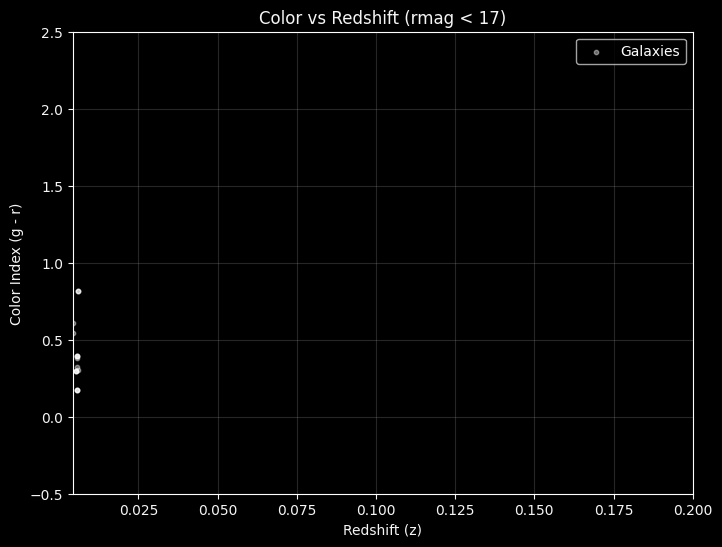

In [9]:
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.animation import FuncAnimation
from astroquery.vizier import Vizier
import pandas as pd
import warnings

# 🔇 Disable warnings
warnings.filterwarnings('ignore')

# === Settings ===
STEP = 20             # сколько точек добавляется за кадр
DURATION_MS = 15000   # общая длительность анимации
INTERVAL = 80        # мс между кадрами

# === Loading table from VizieR ===
Vizier.ROW_LIMIT = -1
catalog_id = "J/A+A/691/A6/tablea2"
result = Vizier.get_catalogs(catalog_id)
df = result[0].to_pandas()

# === Data preparation ===
df = df.dropna(subset=['gmag', 'rmag', 'z'])
df['g_r'] = df['gmag'] - df['rmag']
df = df[df['rmag'] < 17].sort_values('z').reset_index(drop=True)

# Bins by z for smoothed mean
num_bins = 20
z_bins = np.linspace(df['z'].min(), df['z'].max(), num_bins + 1)
z_bin_labels = pd.IntervalIndex.from_breaks(z_bins)
z_bin_centers = z_bin_labels.mid

# === Plot setup (Dark Theme) ===
plt.style.use('dark_background')
fig, ax = plt.subplots(figsize=(8, 6))
fig.patch.set_facecolor('black')
ax.set_facecolor('black')

# Empty scatter and line
scatter_plot = ax.scatter([], [], s=10, alpha=0.4, label='Galaxies', color='white')
(mean_line,) = ax.plot([], [], color='red', linewidth=2.5)  # без label

# Axes and grid look
ax.set_xlim(df['z'].min(), 0.2)  # Ограничиваем ось X до z=0.2
ax.set_ylim(-0.5, 2.5)
ax.set_xlabel('Redshift (z)', color='whitesmoke')
ax.set_ylabel('Color Index (g - r)', color='whitesmoke')
ax.set_title('Color vs Redshift (rmag < 17)', color='whitesmoke')
ax.tick_params(colors='whitesmoke')
ax.grid(True, color='gray', alpha=0.3)
ax.legend()

# === Update function ===
def update(frame):
    end = min(len(df), (frame + 1) * STEP)
    sub = df.iloc[:end].copy()

    # Update points
    scatter_plot.set_offsets(np.c_[sub['z'], sub['g_r']])

    # Обновляем среднюю линию
    sub['z_bin'] = pd.cut(sub['z'], bins=z_bins)
    mean_per_bin = sub.groupby('z_bin')['g_r'].mean()
    mean_per_bin = mean_per_bin.reindex(z_bin_labels)
    mean_line.set_data(z_bin_centers, mean_per_bin.values)

# === Animation ===
num_frames = DURATION_MS // INTERVAL
anim = FuncAnimation(fig, update, frames=num_frames, interval=INTERVAL, repeat=False)

# === For Jupyter Notebooks ===
# from IPython.display import HTML
HTML(anim.to_jshtml())

anim.save("scatter.mp4", writer="ffmpeg", fps=20)
